In [1]:
import pandas as pd
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


# Explore Data

In [2]:
# Load Data 
train_data = pd.read_csv('./data/train.csv')
train_data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


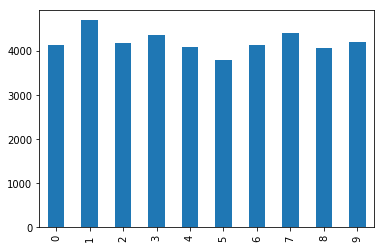

In [24]:
train_data['label'].value_counts().sort_index().plot.bar()

# Prepare Data for Training

In [4]:
def prepare_x(data):
    imgs = data.loc[:, data.columns!='label']
    # scale pixel value between 0 and 1
    imgs = imgs/255
    # reshape data to image format with dimension (28x28x1)
    x = imgs.values.reshape(-1, 28,28,1)
    return x

def prepare_y(data):
    labels = data.label
    # convert labels to one hot encoded vector
    y = to_categorical(labels, num_classes=10)
    return y

In [5]:
train_data = pd.read_csv('./data/train.csv')
train_x = prepare_x(train_data)
train_y = prepare_y(train_data)
print ("Train X shape : " + str(train_x.shape))
print ("Train Y shape : " + str(train_y.shape))

Train X shape : (42000, 28, 28, 1)
Train Y shape : (42000, 10)


# Display Some Images

In [6]:
import matplotlib.pyplot as plt

def showImage(img):
    first_array=(img).reshape([28, 28])
    plt.imshow(first_array)
    plt.gray()
    plt.show()


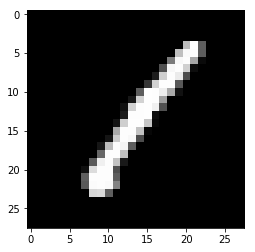

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
showImage(train_x[0])
print(train_y[0])

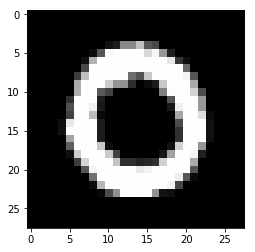

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
showImage(train_x[1])
print(train_y[1])

# Build Models

In [9]:
def get_model1():
    model = Sequential()    
    model.add(Flatten(input_shape = (28,28,1)))    
    model.add(Dense(512, activation = "relu"))    
    model.add(Dropout(0.25))    
    model.add(Dense(256, activation = "relu"))    
    model.add(Dropout(0.25))    
    model.add(Dense(10, activation = "softmax"))    
    optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])    
    return model

In [10]:
def get_model2():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    
    optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"]) 
    
    return model

In [44]:
def get_model3():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    
    optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"]) 
    
    return model

In [11]:
def plot_accuracy(history):    

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
def plot_loss(history):

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Training

## Model1

In [12]:
model1 = get_model1()
model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)      

In [13]:
history = model1.fit(x=train_x, y=train_y, batch_size=64, epochs=10, validation_split=0.2, )

Instructions for updating:
Use tf.cast instead.
Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 2s 57us/step - loss: 0.3014 - acc: 0.9050 - val_loss: 0.1415 - val_acc: 0.9552
Epoch 2/10
33600/33600 [==============================] - 1s 40us/step - loss: 0.1357 - acc: 0.9598 - val_loss: 0.1074 - val_acc: 0.9682
Epoch 3/10
33600/33600 [==============================] - 1s 40us/step - loss: 0.1051 - acc: 0.9684 - val_loss: 0.1009 - val_acc: 0.9720
Epoch 4/10
33600/33600 [==============================] - 2s 48us/step - loss: 0.0800 - acc: 0.9762 - val_loss: 0.1127 - val_acc: 0.9715
Epoch 5/10
33600/33600 [==============================] - 2s 50us/step - loss: 0.0673 - acc: 0.9801 - val_loss: 0.1081 - val_acc: 0.9760
Epoch 6/10
33600/33600 [==============================] - 2s 50us/step - loss: 0.0631 - acc: 0.9818 - val_loss: 0.1041 - val_acc: 0.9750
Epoch 7/10
33600/33600 [==============================] - 2s 50us/step - loss: 0.

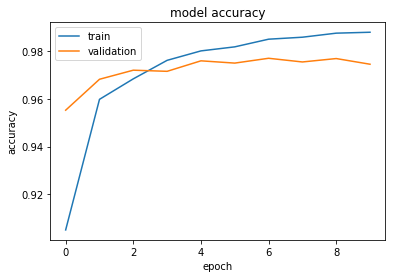

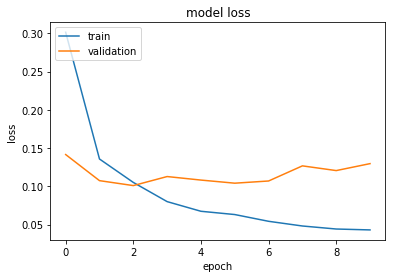

In [14]:
plot_accuracy(history)
plot_loss(history)

## Model 2

In [15]:
model2= get_model2()
history2 = model2.fit(x=train_x, y=train_y, batch_size=64, epochs=10, validation_split=0.2, )

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 5s 141us/step - loss: 0.2362 - acc: 0.9255 - val_loss: 0.0569 - val_acc: 0.9805
Epoch 2/10
33600/33600 [==============================] - 4s 129us/step - loss: 0.0755 - acc: 0.9775 - val_loss: 0.0534 - val_acc: 0.9838
Epoch 3/10
33600/33600 [==============================] - 4s 128us/step - loss: 0.0572 - acc: 0.9822 - val_loss: 0.0349 - val_acc: 0.9905
Epoch 4/10
33600/33600 [==============================] - 4s 113us/step - loss: 0.0470 - acc: 0.9863 - val_loss: 0.0396 - val_acc: 0.9877
Epoch 5/10
33600/33600 [==============================] - 4s 106us/step - loss: 0.0472 - acc: 0.9863 - val_loss: 0.0309 - val_acc: 0.9920
Epoch 6/10
33600/33600 [==============================] - 4s 118us/step - loss: 0.0400 - acc: 0.9882 - val_loss: 0.0354 - val_acc: 0.9915
Epoch 7/10
33600/33600 [==============================] - 4s 120us/step - loss: 0.0369 - acc: 0.9890 - val_loss: 0.0294 - v

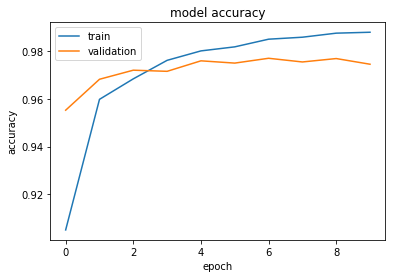

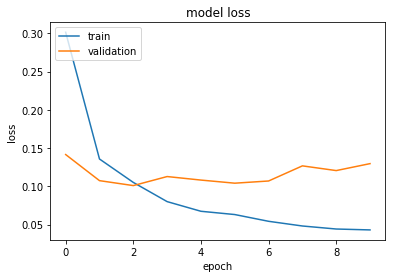

In [16]:
from util import plot_accuracy, plot_loss
plot_accuracy(history)
plot_loss(history)

# Model 3

In [46]:
model3 = get_model3()
history3 = model3.fit(x=train_x, y=train_y, batch_size=64, epochs=10, validation_split=0.2, )

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 10s 286us/step - loss: 0.2415 - acc: 0.9265 - val_loss: 0.0672 - val_acc: 0.9800
Epoch 2/10
33600/33600 [==============================] - 9s 269us/step - loss: 0.0769 - acc: 0.9768 - val_loss: 0.0505 - val_acc: 0.9854
Epoch 3/10
33600/33600 [==============================] - 9s 262us/step - loss: 0.0585 - acc: 0.9829 - val_loss: 0.0434 - val_acc: 0.9870
Epoch 4/10
33600/33600 [==============================] - 9s 255us/step - loss: 0.0505 - acc: 0.9851 - val_loss: 0.0497 - val_acc: 0.9881
Epoch 5/10
33600/33600 [==============================] - 9s 261us/step - loss: 0.0452 - acc: 0.9869 - val_loss: 0.0366 - val_acc: 0.9889
Epoch 6/10
33600/33600 [==============================] - 9s 262us/step - loss: 0.0439 - acc: 0.9874 - val_loss: 0.0451 - val_acc: 0.9882
Epoch 7/10
33600/33600 [==============================] - 8s 241us/step - loss: 0.0417 - acc: 0.9882 - val_loss: 0.0451 - 

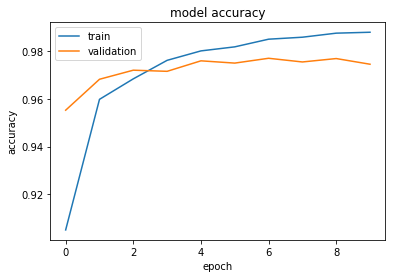

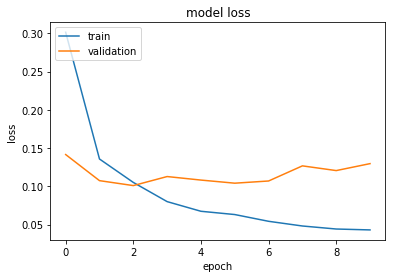

In [47]:
plot_accuracy(history)
plot_loss(history)

# Testing

In [21]:
test_data = pd.read_csv('./data/test.csv')
test_x = prepare_x(test_data)
print ("Test X shape : " + str(test_x.shape))

Test X shape : (28000, 28, 28, 1)


In [ ]:
def get_prediction(model, imgs):
    predictio
    

In [22]:
model1.predict(test_x)

array([[7.5741342e-21, 4.2917575e-21, 1.0000000e+00, ..., 1.6564113e-16,
        6.8970086e-22, 7.5583059e-24],
       [1.0000000e+00, 8.7096561e-23, 1.0884766e-20, ..., 2.6712087e-14,
        2.1499797e-20, 2.6510492e-17],
       [5.4845257e-11, 2.6398530e-08, 1.2482704e-08, ..., 2.8709539e-05,
        2.2591125e-06, 9.9634969e-01],
       ...,
       [1.0927151e-29, 9.5843964e-21, 3.0068266e-19, ..., 5.6547211e-22,
        2.7168201e-15, 8.0557234e-17],
       [9.5727613e-11, 2.9256143e-11, 3.3202005e-10, ..., 3.0393076e-05,
        1.2046975e-08, 9.9907815e-01],
       [2.7943344e-18, 4.0743383e-16, 1.0000000e+00, ..., 9.1182461e-15,
        1.2143367e-16, 5.4978389e-19]], dtype=float32)

In [30]:
pred_1 = model1.predict_classes(test_x)

In [31]:
pred_2 = model2.predict_classes(test_x)

In [48]:
pred_3 = model3.predict_classes(test_x)

In [35]:
# Visualize test Results

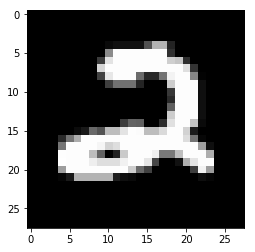

Preiction by model1: 2
Preiction by model2: 2
Preiction by model3: 2


In [49]:
i=0
showImage(test_x[i])
print("Preiction by model1: " + str(pred_1[i]))
print("Preiction by model2: " + str(pred_2[i]))
print("Preiction by model3: " + str(pred_3[i]))


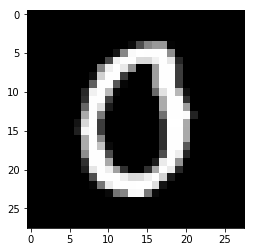

Preiction by model1: 0
Preiction by model2: 0
Preiction by model3: 0


In [50]:
i=100
showImage(test_x[i])
print("Preiction by model1: " + str(pred_1[i]))
print("Preiction by model2: " + str(pred_2[i]))
print("Preiction by model3: " + str(pred_3[i]))


# Submission to kaggle

In [51]:
result = pd.Series(pred_3, name = "Label")
submit = pd.concat([pd.Series(range(1, 28001), name = "ImageId"), result], axis = 1)
submit.to_csv("Submission.csv", index = False)